# 6. Quiz

## 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.

주의) 사전 작업으로 아래 코드 셀을 먼저 실행하시오

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장하시오.

In [30]:
dataset = pd.read_csv("QuizData.csv")

In [31]:
total = dataset.iloc[:, :-1].values
reception = dataset.iloc[:,-1].values

In [32]:
total

array([[118],
       [253],
       [320],
       [ 94],
       [155],
       [188],
       [201],
       [338],
       [186],
       [183],
       [223],
       [392],
       [ 86],
       [112],
       [129],
       [223],
       [288],
       [262],
       [143],
       [179]])

In [33]:
reception

array([ 62, 148, 201,  80,  92, 131, 147, 187, 124, 152, 143, 199,  58,
        68,  76, 149, 152, 183,  88, 101])

In [34]:
dataset

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92
5,188,131
6,201,147
7,338,187
8,186,124
9,183,152


## 2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하시오. 이 때 비율은 75 : 25 로 합니다.

(단, random_state = 0 으로 설정)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total, reception, test_size = 0.25, random_state=0)

## 3) 훈련 세트를 이용하여 단순 선형 회귀 (Simple Linear Regression) 모델을 생성하시오.

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = reg.predict(X_train)

In [40]:
y_pred

array([157.62040465, 126.62674204,  81.4064802 , 103.25447187,
       187.08978877, 120.02153525,  90.0440583 , 117.48107111,
       196.23545971, 170.83081822, 223.67247251,  72.26080926,
        84.45503717, 137.80478429,  68.19606662])

## 4) 데이터 시각화 (훈련 세트) 코드를 작성하시오.

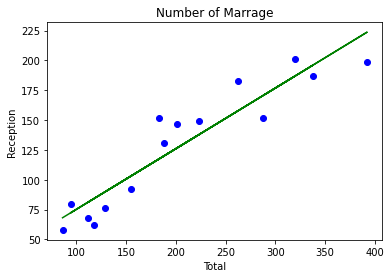

In [41]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, y_pred, color = "green")
plt.title("Number of Marrage")
plt.xlabel("Total")
plt.ylabel("Reception")
plt.show()

## 5) 데이터 시각화 (테스트 세트) 코드를 작성하시오.

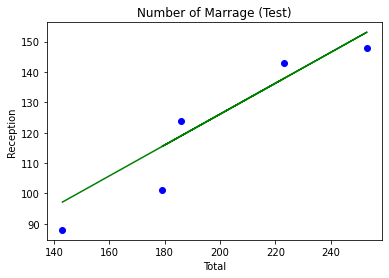

In [43]:
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, reg.predict(X_test), color="green")
plt.title("Number of Marrage (Test)")
plt.xlabel("Total")
plt.ylabel("Reception")
plt.show()

## 6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [45]:
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.8707088403321211
0.8634953212566615


## 7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [48]:
predict = reg.predict([[300]])
np.around(predict).astype(int)

array([177])